## Model Performance over Time

This notebook builds on results generated by *compute_time_specialized.py*. It shows the performance of models for different points in the interaction sequence.  

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Formatting instructions for plots
from matplotlib import rcParams
%config InlineBackend.figure_format = 'retina'
params= {'text.latex.preamble' : [ "\\usepackage{times}",
        "\\usepackage[T1]{fontenc}",
        "\\usepackage{bm}",
        "\\usepackage{amsmath}",
        "\\usepackage{amssymb}",]}
plt.rcParams.update(params)
#plt.rcParams['figure.figsize'] = (18,14)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 220
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 17
plt.rc('axes', titlesize=30, labelsize = 22)
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels


/usr0/home/rschmuck/installs/miniconda3/envs/vedu/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


### Select experiment

In [3]:
DATASETS = ["elemmath_2021", "ednet_kt3", "eedi", "junyi_15"]
BOUNDS = [(0, 10), (10, 25), (25, 50), (50, 100), (100, 250),
          (250, 500), (500, np.inf)]

# suf = "i_s_scA_scW_tcA_tcW"
# MODEL = "Best-LR"

suf = "i_icA_TW_icW_TW_n_gram_ppe_rpfa_F_rpfa_R_s_scA_TW_scW_TW_tcA_TW_tcW_TW_user_avg_correct"
MODEL = "Best-LR+"

labels = {
    0: "Generalist model",
    1: "Time specialized models"
}

DATASET_NAMES = {
    "elemmath_2021": "ElemMath",  # 2021
    "ednet_kt3": "EdNet KT3",  # KT3
    "eedi": "Eedi",
    "junyi_15": "Junyi15"
}


[0.76476122 0.78447094 0.78636483 0.7933533  0.80262899 0.81247836
 0.79347373] [0.00318839 0.0019329  0.00146733 0.0009198  0.00077618 0.00405309
 0.0004596 ]
[0.76644201 0.78235187 0.78224943 0.79203909 0.80126184 0.80836752
 0.79162011] [0.00232153 0.00173113 0.00154278 0.00083008 0.00076139 0.004521
 0.00052669]


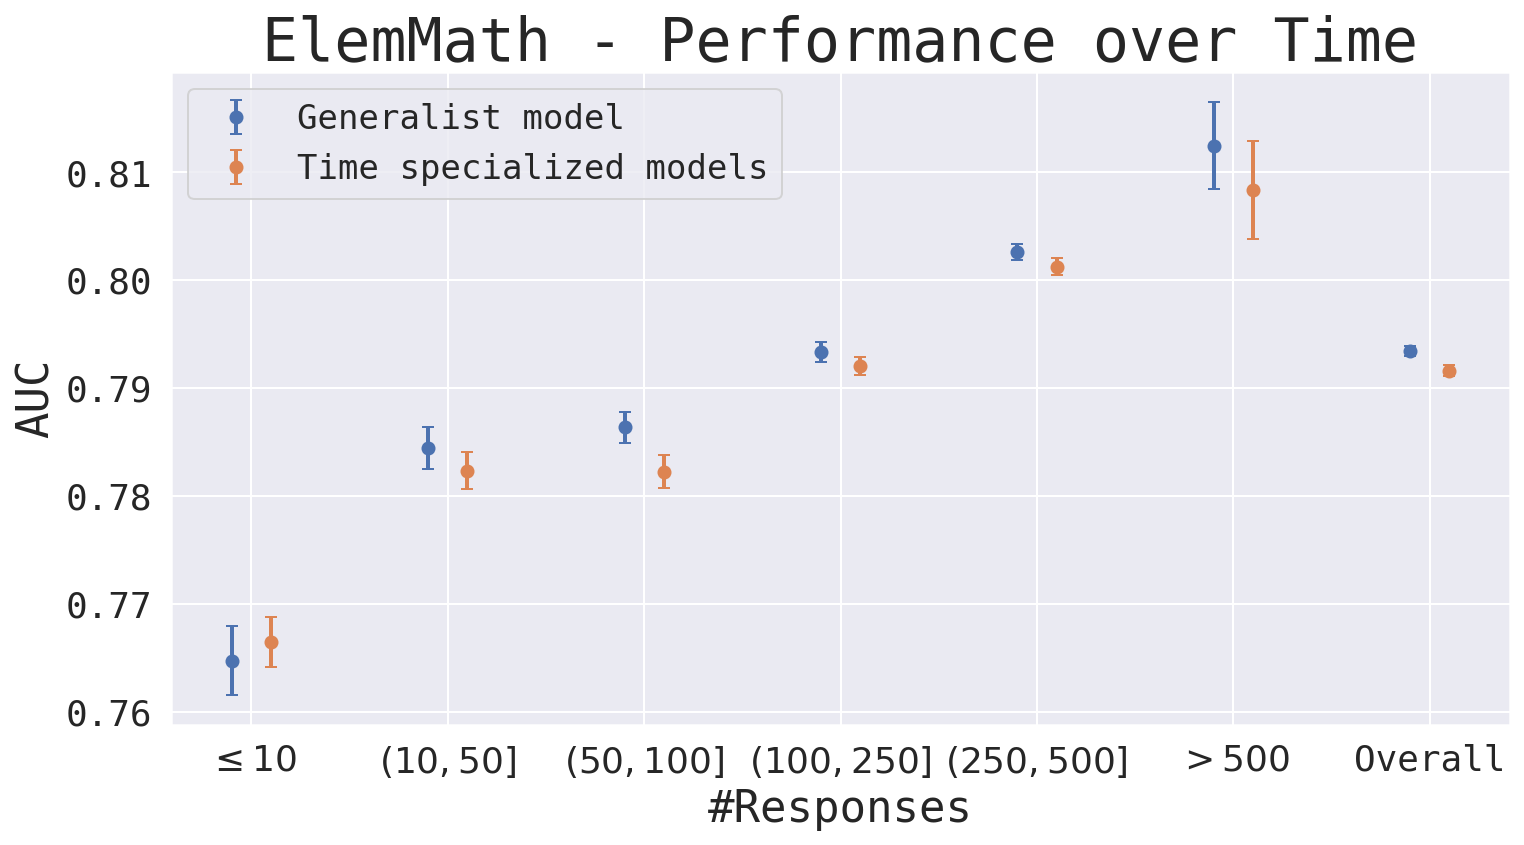

In [4]:
# Load data

dataset = "elemmath_2021"

g_path = "./temporal/" + dataset + "_generalist_" + suf + ".pkl"
s_path = "./temporal/" + dataset + "_time_specialized_" + suf + ".pkl"

g_data = pickle.load(open(g_path, "rb"))
s_data = pickle.load(open(s_path, "rb"))

fig, ax = plt.subplots(figsize=(12,6))


for i, data in enumerate([g_data, s_data]):  # , "cross_te_accs"
    k = "cross_te_aucs"
    # k = "cross_te_accs"
    avgs = np.average(data[k], axis=0) 
    stds = 2 * np.std(data[k], axis=0) 
    print(avgs, stds)
    # ax.scatter(range(1, len(avgs) + 1), avgs, label=k[6:])

    pos = np.array(range(len(avgs))) + 0.90 + (0.20 * i)
    ax.errorbar(pos, avgs, yerr=stds, fmt='o',  capsize=3, label=labels[i])

plt.xlabel("#Responses")
ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
xlabels = ['$\leq 10$', '$(10, 50]$', '$(50, 100]$', '$(100, 250]$', "$(250, 500]$", "$>500$", "Overall"]
ax.set_xticklabels(xlabels)
plt.ylabel("AUC")

plt.title(DATASET_NAMES[dataset] + " - Performance over Time")
plt.legend()
plt.savefig(dataset + "_time.pdf")
plt.show()


elemmath_2021
[0.76476122 0.78447094 0.78636483 0.7933533  0.80262899 0.81247836
 0.79347373] [0.00318839 0.0019329  0.00146733 0.0009198  0.00077618 0.00405309
 0.0004596 ]
[0.76644201 0.78235187 0.78224943 0.79203909 0.80126184 0.80836752
 0.79162011] [0.00232153 0.00173113 0.00154278 0.00083008 0.00076139 0.004521
 0.00052669]
ednet_kt3
[0.69984836 0.73416032 0.7400234  0.73937535 0.74160009 0.7554463
 0.7464524 ] [0.00260444 0.00094861 0.00119746 0.00168686 0.00335099 0.00596743
 0.00292916]
[0.70776897 0.73435229 0.73706173 0.73865086 0.74042083 0.75810853
 0.74722545] [0.00262206 0.00074185 0.00134023 0.00153486 0.00314277 0.00527932
 0.00276582]
eedi
[0.76237982 0.79332138 0.8015256  0.81001341 0.81527052 0.81648615
 0.80399387] [0.00129498 0.00224144 0.00068727 0.00214501 0.00261739 0.00432428
 0.00143094]
[0.76939045 0.79387318 0.80059036 0.80949125 0.81407756 0.81442829
 0.80389174] [0.00132963 0.00229045 0.00062439 0.00213781 0.0026622  0.00425645
 0.00147781]
junyi_15
[0.79

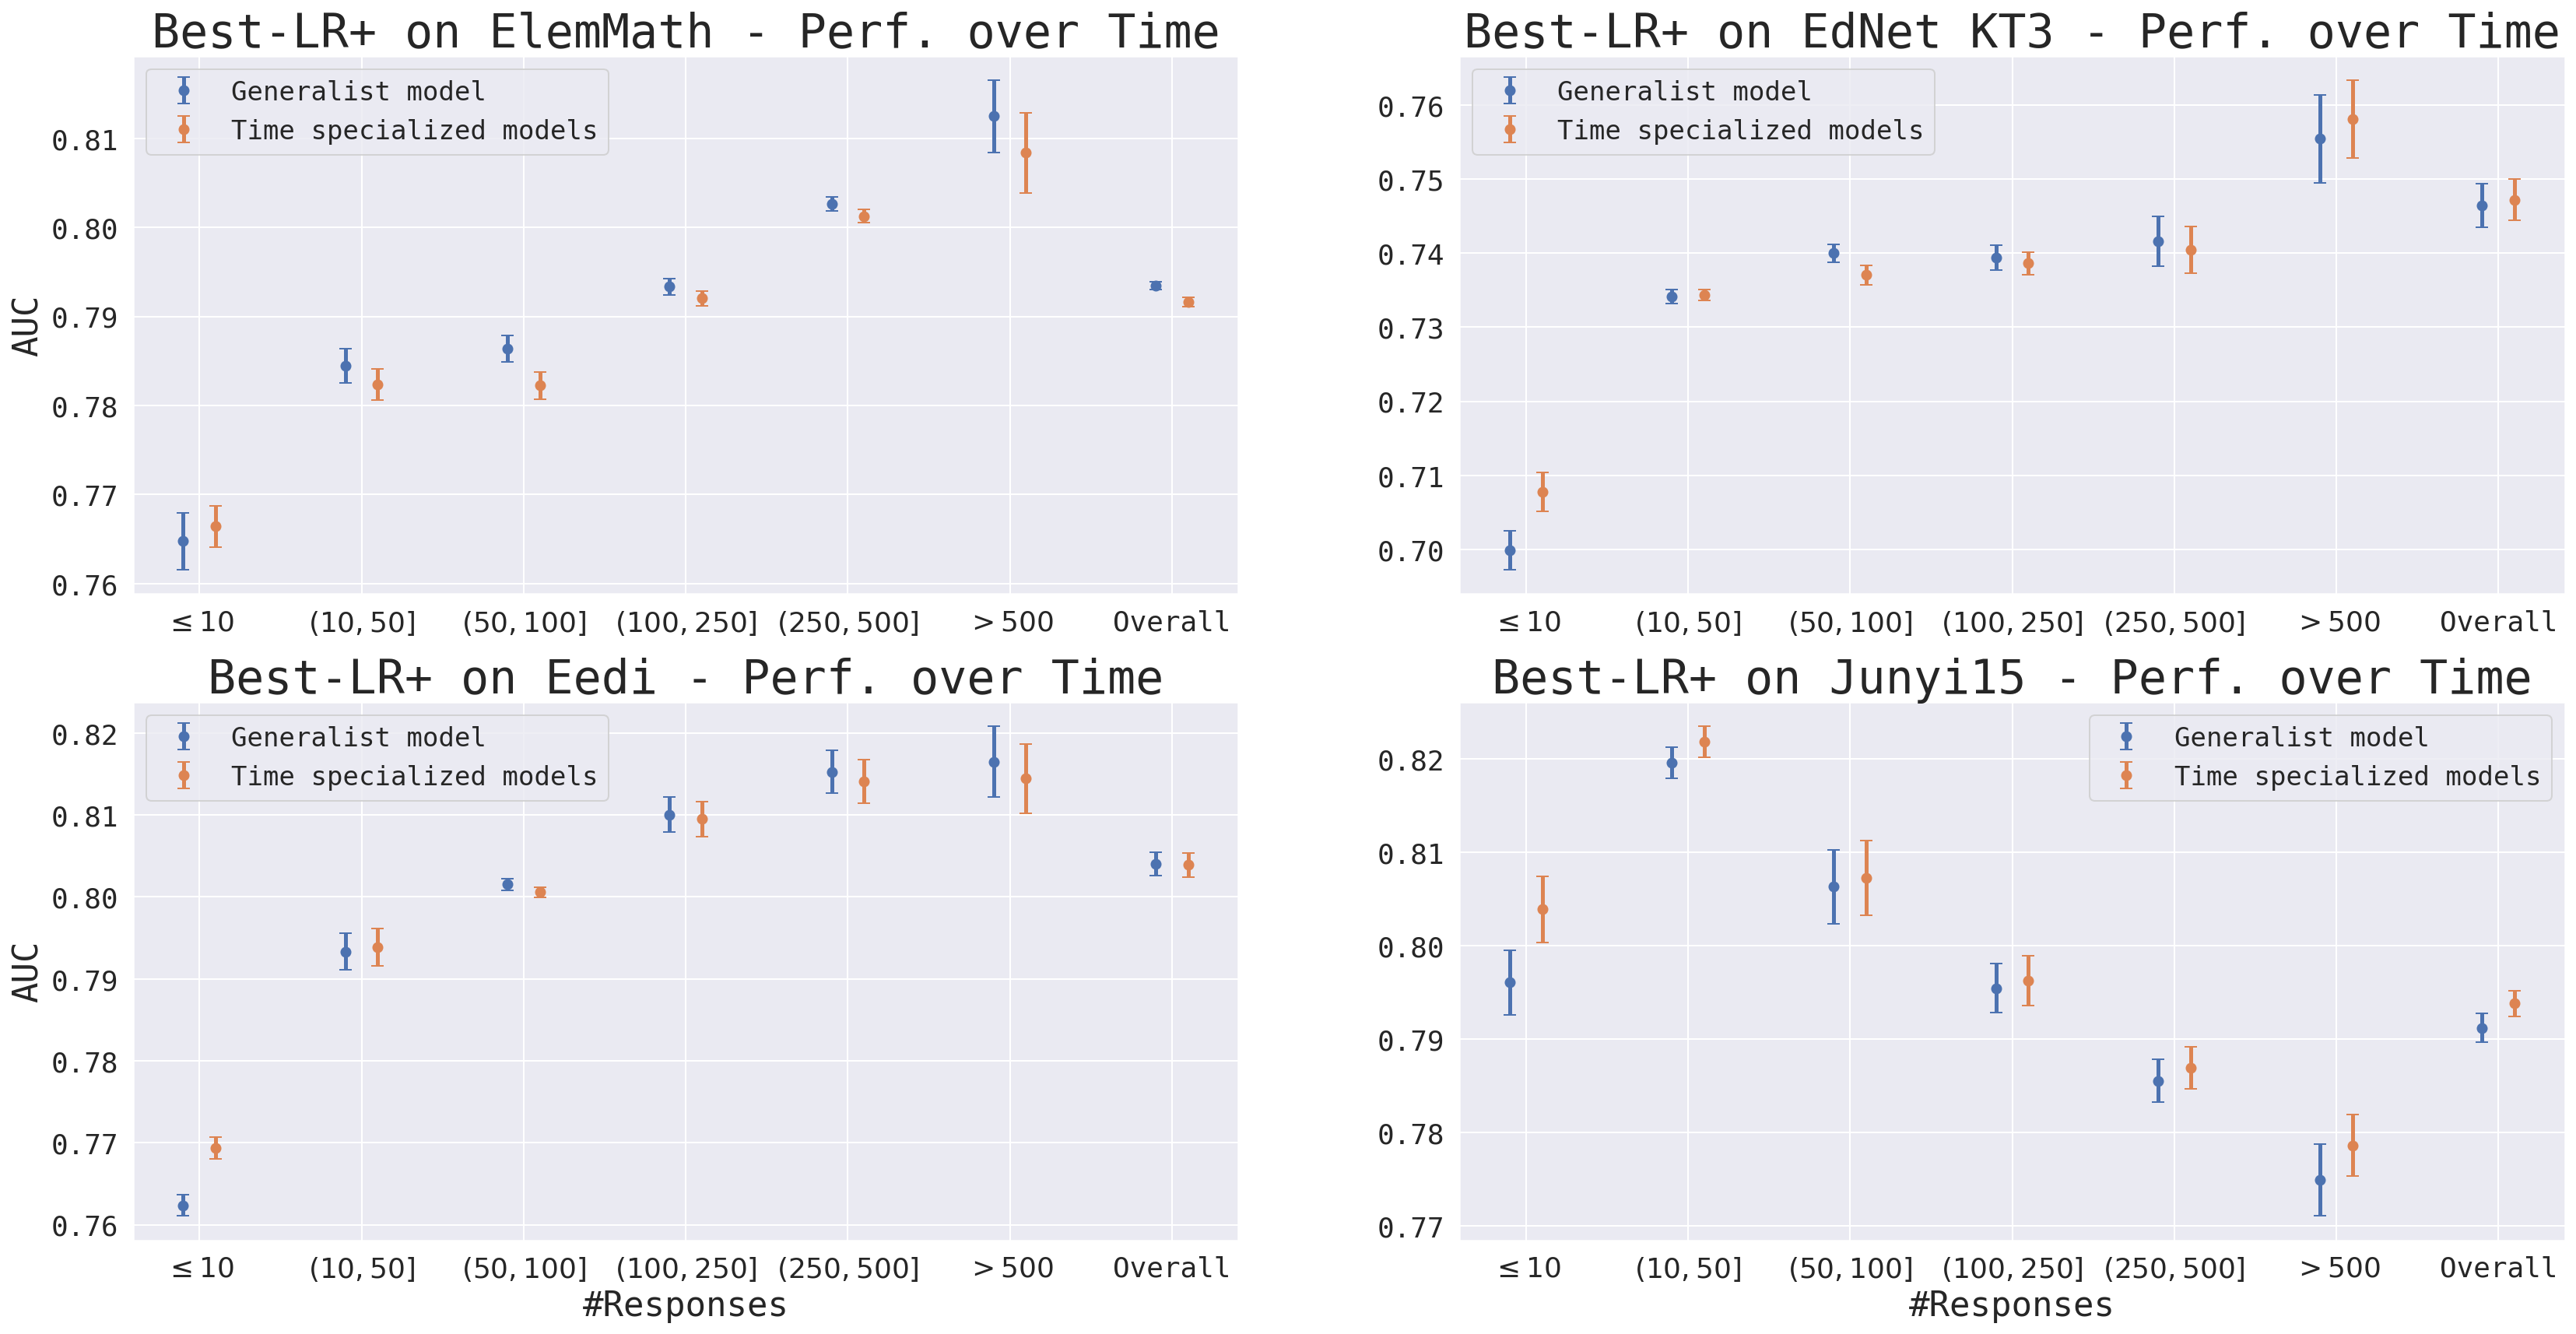

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(28, 14))


for i, dataset in enumerate(DATASET_NAMES):
    print(dataset)
    
    ax = axs[i // 2][i % 2]

    g_path = "./temporal/" + dataset + "_generalist_" + suf + ".pkl"
    s_path = "./temporal/" + dataset + "_time_specialized_" + suf + ".pkl"
    g_data = pickle.load(open(g_path, "rb"))
    s_data = pickle.load(open(s_path, "rb"))

    for j, data in enumerate([g_data, s_data]):  # , "cross_te_accs"
        k = "cross_te_aucs"
        # k = "cross_te_accs"
        avgs = np.average(data[k], axis=0) 
        stds = 2 * np.std(data[k], axis=0) 
        print(avgs, stds)
        # ax.scatter(range(1, len(avgs) + 1), avgs, label=k[6:])

        pos = np.array(range(len(avgs))) + 0.90 + (0.20 * j)
        ax.errorbar(pos, avgs, yerr=stds, fmt='o',  elinewidth=2.5, capsize=4, label=labels[j])

    if i // 2 == 1:
        ax.set_xlabel("#Responses")
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
    xlabels = ['$\leq 10$', '$(10, 50]$', '$(50, 100]$', '$(100, 250]$', "$(250, 500]$", "$>500$", "Overall"]
    ax.set_xticklabels(xlabels)

    if i % 2 == 0:
        ax.set_ylabel("AUC")
    ax.set_title(MODEL + " on " + DATASET_NAMES[dataset] + " - Perf. over Time")
    ax.legend()
plt.savefig("performance_over_time.pdf", bbox_inches='tight')   

plt.show()


